This is the work for reproducing Alphafold 1 using pytorch and pyRosetta for optimization. This work is done for Oxford Summer Project, under supervision of Dr.Cris Salvi. 
<br>

# Initialization

In [6]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/alphafold_pytorch/alphafold_pytorch-29bd20b0ca0ccd31d984a7dc53f0302d945a2ddc/")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Run the alphafold to get distogram and torsion angle distribution

In [ ]:
!bash alphafold.sh

Note that this model has parameters number of **21182345**.

For secondary structure, the code is: <br>
310 helix (G), α-helix (H), π-helix (I), β-stand (E), bridge (B), turn (T), bend (S), and others (C)

Assuming a length of 88 protein (T1019s2):
<br>
For distrogram, the shape is (88,88,64) this represents 88 * 88 full case, 64 bin, ranges from 
<br>
<br>
For torsion angle, the shape is (88,1296), so for 88 each residue, 360° is divided into 10° per Bin，so 2 angles gives permutation of 36*36 = 1296 bins. We can thus recover from the true torsion angle 



# Outputs of the pytorch alphafold:

In [ ]:
import numpy as np
DIST_PATH = "/content/drive/MyDrive/Colab Notebooks/alphafold_pytorch/alphafold_pytorch-29bd20b0ca0ccd31d984a7dc53f0302d945a2ddc/T1019s2_out/Distogram/ensemble/T1019s2.distance"
with open(DIST_PATH, "rb") as npy:
    dist = np.load(npy,allow_pickle=True)
    # print(dist[0]) 
    # (88,88,64) this represents 88*88 full case, 64 bin, ranges from 

TORSION_PATH = "/content/drive/MyDrive/Colab Notebooks/alphafold_pytorch/alphafold_pytorch-29bd20b0ca0ccd31d984a7dc53f0302d945a2ddc/T1019s2_out/Torsion/0/T1019s2.torsion"
with open(TORSION_PATH, "rb") as npy:
    tor = np.load(npy,allow_pickle = True)
    #print(np.shape(tor)) 
    # 88 * 1296, so for 88 each residue, 360° is divided into 10° per Bin，so 2 angles gives permutation of 1296 bins
#SEQ = "KVEPVGNAYGHWTKHGKEFPEYQNAKQYVDAAHNFMTNPPPGTLTKTRPNGDTLYYNPVTNVFASKDINGVPRTMFKPEKGIEYWNKQ"
  

[[9.45430040e-01 4.50605265e-04 4.46670107e-04 ... 7.98051246e-04
  8.03211122e-04 1.68072451e-02]
 [5.58058498e-04 3.24139546e-04 3.19845509e-04 ... 1.18778751e-03
  1.17322395e-03 1.58929564e-02]
 [5.98693267e-04 3.07850598e-04 3.00010870e-04 ... 1.03596342e-03
  1.01329223e-03 1.61754154e-02]
 ...
 [1.38144533e-04 1.16510491e-04 1.15808260e-04 ... 5.40993689e-03
  5.60435932e-03 8.75269055e-01]
 [1.37830910e-04 1.16420255e-04 1.15374802e-04 ... 5.63999126e-03
  5.82111580e-03 8.69520366e-01]
 [1.46868842e-04 1.34041009e-04 1.32769113e-04 ... 8.86165258e-03
  9.21277609e-03 8.17480922e-01]]


#Install pyRosetta for optimization

In [ ]:
!pip install pyrosettacolabsetup
import pyrosettacolabsetup; pyrosettacolabsetup.install_pyrosetta()
'''
Username: levinthal
Password: paradox
'''
import pyrosetta; pyrosetta.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
PyRosetta-4 2022 [Rosetta PyRosetta4.MinSizeRel.python37.ubuntu 2022.28+release.6c2ddeccd31e780da01b0cbbf3e33949218c99d9 2022-07-12T15:12:13] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python37.ubuntu r324 2022.28+release.6c2ddeccd31 6c2ddeccd31e780da01b0cbbf3e33949218c99d9 http://www.pyrosetta.org 2022-07-12T15:12:13
core.init: command: PyRosetta -ex1 -ex2aro -database /usr/local/lib/python3.7/dist-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=-519751358 seed_offset=0 real_seed=-519751358
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=-519751358 RG_type=mt19937


A more systematic way of drawing out the pipeline using RosettaPy is from the github of https://github.com/leklab/alphafoldv1
He has provided a systematic way of converting the output distrogram and torsion angles into the pdb file. We slightly alter the input data files to fit our own model. However, this is the way RaptorX used, not the original Alphafold one.
https://github.com/j3xugit/RaptorX-3DModeling
<br> <br>
Here we just have to call the following scripts for optimizing based on the constrained,and output the file in either pdb form and drawing out

#Generate Constraints file for Optimization

In [ ]:
#Create torsion stat files
!python3 alphafoldv1-main/make_torsion_stats.py -i T1019s2_out/Torsion/0/T1019s2.torsion -s test_data/T1019s2.pkl -o torsion.pickle

  0% 0/88 [00:00<?, ?it/s]Calculating torsion stats for residue 1
(-1.826039341982756, 2.411424920690142, 0.5052785452219416, 0.5399559648488634)
  1% 1/88 [00:05<07:46,  5.36s/it]Calculating torsion stats for residue 2
(-1.7956793448441066, 2.389507719610023, 0.22859284607385244, 0.1503841197672449)
  2% 2/88 [00:17<13:47,  9.63s/it]Calculating torsion stats for residue 3
(-1.7460374483549317, 2.457952165120118, 0.3458866733190303, 0.2596819906431417)
  3% 3/88 [00:26<12:44,  8.99s/it]Calculating torsion stats for residue 4
(-1.1826370315285288, 2.696638340870338, 0.06573410374195121, 1.1315265574197886)
  5% 4/88 [00:30<10:08,  7.24s/it]Calculating torsion stats for residue 5
(-1.4223003834229258, 1.1846461388784295, 0.4765702026456415, 2.6648726626991976)
  6% 5/88 [00:34<08:28,  6.13s/it]Calculating torsion stats for residue 6
(-1.194528144494834, -0.49623966465992436, 1.153222982927239, 0.8259753260521678)
  7% 6/88 [00:39<07:32,  5.52s/it]Calculating torsion stats for residue 7
(

In [ ]:
#Create Rosetta constraint file and histogram files
!python3 alphafoldv1-main/make_constraints.py --sequence test_data/T1019s2.pkl --hist test_hist --distance T1019s2_out/Distogram/ensemble/T1019s2.distance --torsion torsion.pickle --out constraint_test

#Actual Folding and Optimization

In [ ]:
#Fold using Rosetta
!python3 alphafoldv1-main/fold.py --sequence test_data/T1019s2.pkl --constraints constraint_test --out T1019s2.pdb

PyRosetta-4 2022 [Rosetta PyRosetta4.MinSizeRel.python37.ubuntu 2022.28+release.6c2ddeccd31e780da01b0cbbf3e33949218c99d9 2022-07-12T15:12:13] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags 
core.init: Rosetta version: PyRosetta4.MinSizeRel.python37.ubuntu r324 2022.28+release.6c2ddeccd31 6c2ddeccd31e780da01b0cbbf3e33949218c99d9 http://www.pyrosetta.org 2022-07-12T15:12:13
core.init: command: PyRosetta -ex1 -ex2aro -database /usr/local/lib/python3.7/dist-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=15088683 seed_offset=0 real_seed=15088683
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=15088683 RG_type=mt19937
core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 985 residue types
core.ch

#Download Pymol

In [4]:
from IPython.utils import io
import tqdm.notebook
import os
"""The PyMOL installation is done inside two nested context managers. This approach
was inspired by Dr. Christopher Schlick's (of the Phenix group at
Lawrence Berkeley National Laboratory) method for installing cctbx
in a Colab Notebook. He presented his work on September 1, 2021 at the IUCr
Crystallographic Computing School. I adapted Chris's approach here. It replaces my first approach
that requires seven steps. My approach was presentated at the SciPy2021 conference
in July 2021 and published in the
[proceedings](http://conference.scipy.org/proceedings/scipy2021/blaine_mooers.html).
The new approach is easier for beginners to use. The old approach is easier to debug
and could be used as a back-up approach.

I thank Professor David Oppenheimer of the University of Florida for the code for installing Open Source PyMOL.
"""
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:

        !pip install -q condacolab
        import condacolab
        condacolab.install()
        pbar.update(10)

        import sys
        sys.path.append('/usr/local/lib/python3.7/site-packages/')
        pbar.update(20)

        # Install PyMOL
        %shell mamba install -c schrodinger pymol-bundle --yes

        pbar.update(90)

        # Mount Google Drive and upload your PyMOL license
        from google.colab import drive
        drive.mount("/content/drive")
        %shell cp ./drive/MyDrive/Colab\ Notebooks/license.lic .
        pbar.update(100)


  0%|          | 0/100 [00:00<?, ?it/s]

# Generate and Print the result:

In [7]:
#Generate the image
!python3 alphafoldv1-main/make_pdb_image.py --pdb T1019s2.pdb --sec T1019s2_out/Distogram/0/T1019s2.sec -o T1019s2_pdb.png

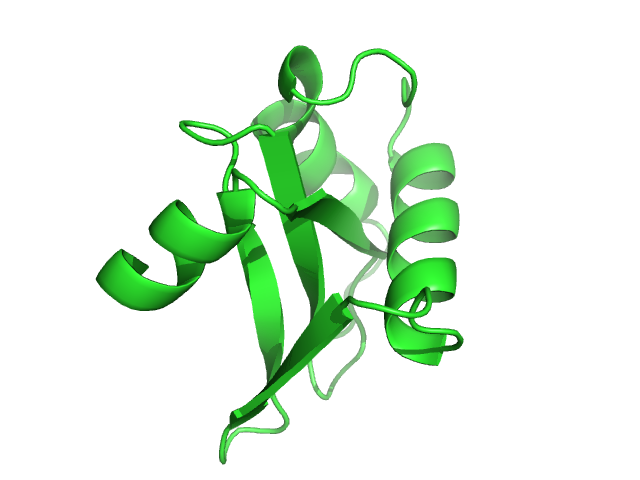

In [8]:
from IPython.display import Image
Image('T1019s2_pdb.png')